In [4]:
import seaborn as sns
import pandas as pd 
import datetime as datetime
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import numpy as np
# Read data from file 'filename.csv' |
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("/home/anconam/projects/Shapley_Pruning/experiments/results/log.csv") 
data['timestamp'].apply(lambda row: str(row))
data.head()

,timestamp,epoch,train_acc,test_acc,train_loss,test_loss,n_params,train_time,prune_time,experiment
0,20200115T204705,1,0.868763,0.8919,0.378915,0.308388,3064413,11.358367,8.339023,fmnist_sv-zeros_0.0_45steps
1,20200115T204705,2,0.911695,0.9058,0.247400,0.249891,2129349,5.716040,2.341623,fmnist_sv-zeros_0.0_45steps
2,20200115T204705,3,0.930136,0.9170,0.192175,0.229399,1752266,5.418230,1.940314,fmnist_sv-zeros_0.0_45steps
3,20200115T204705,4,0.943627,0.9181,0.156954,0.236956,1425532,5.199785,1.757558,fmnist_sv-zeros_0.0_45steps
4,20200115T204705,5,0.951237,0.9191,0.135523,0.237522,1233211,5.321688,1.647508,fmnist_sv-zeros_0.0_45steps


### FMNIST CNN 1.8M parameters

Accuracy
                                   test_acc
experiment                                 
fmnist_sv-nonpositive_0.0_45steps  0.917500
fmnist_sv-zeros_0.0_45steps        0.923533
Training time
                                   train_time  prune_time
experiment                                               
fmnist_sv-nonpositive_0.0_45steps  170.514955   51.207366
fmnist_sv-zeros_0.0_45steps        247.418560   50.786948
Sparsity
                                   n_params
experiment                                 
fmnist_sv-nonpositive_0.0_45steps  0.144654
fmnist_sv-zeros_0.0_45steps        1.478450


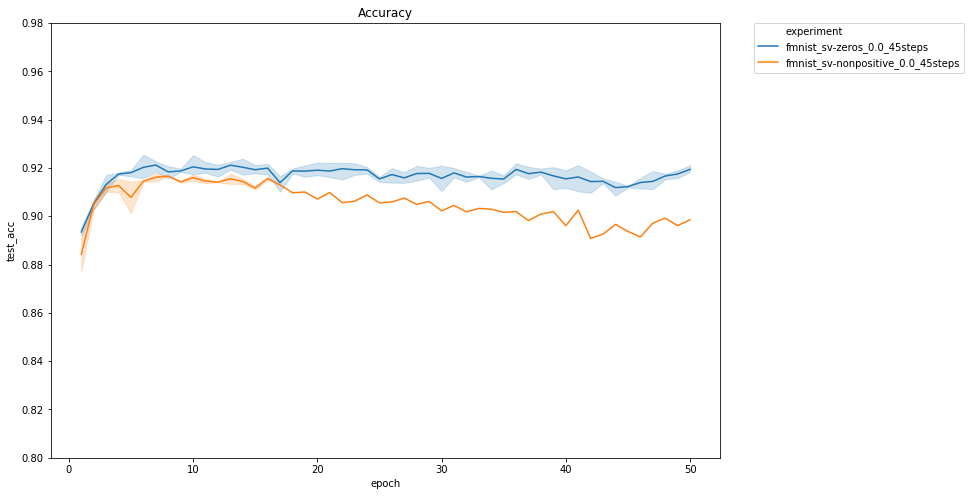

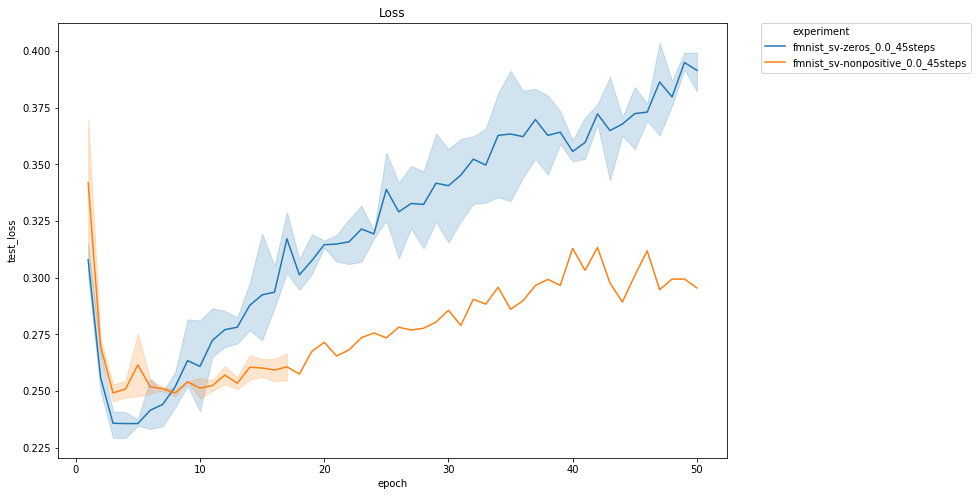

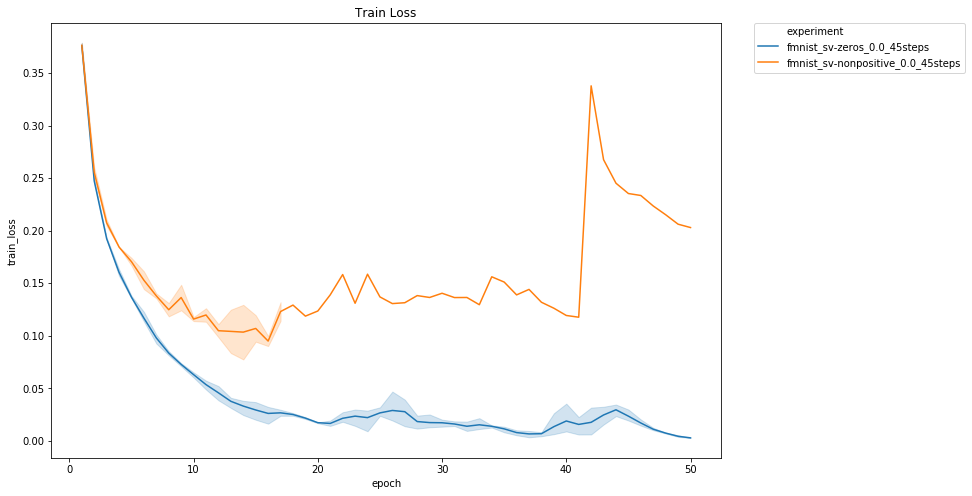

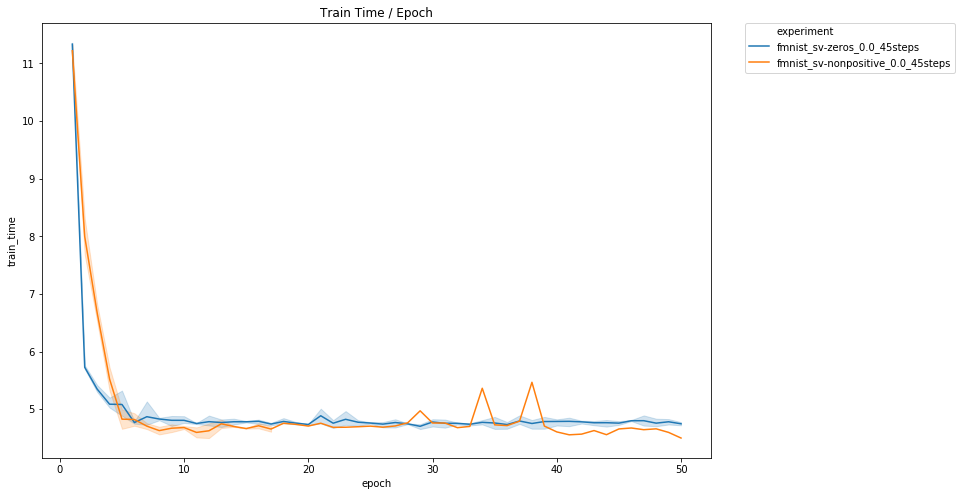

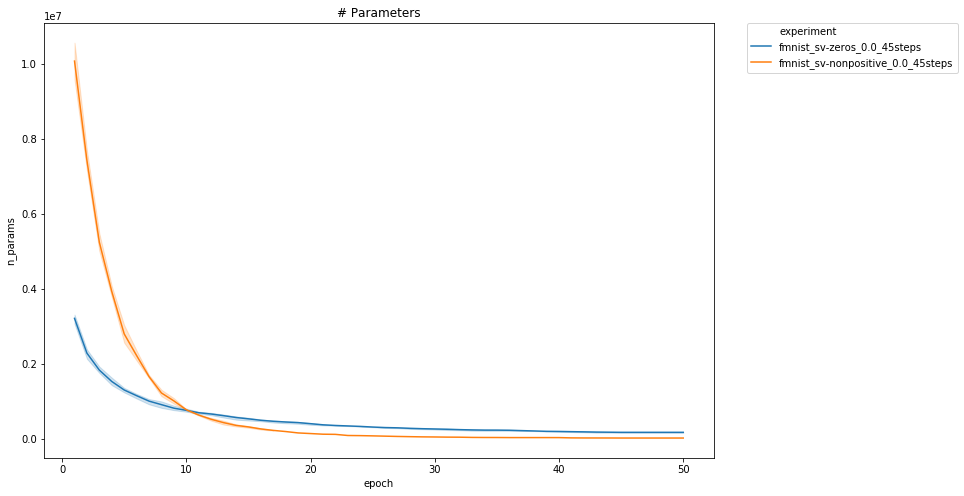

In [5]:
dataset = "fmnist"

plot_df = data[data["experiment"].str.startswith(dataset)]
# plot_df = plot_df[plot_df["experiment"].str.contains("SET7")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("prunedyn_sv")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("in1ep")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("random")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("0.15")]

# Print train time
print ("Accuracy")
performance_df = plot_df.groupby(['experiment', 'timestamp']).max()
performance_df = performance_df.groupby(['experiment']).mean()
print (performance_df.filter(items=["experiment", "test_acc"]))

# Print train time
print ("Training time")
time_df = plot_df.groupby(['experiment', 'timestamp']).sum()
time_df = time_df.groupby(['experiment']).mean()
print (time_df.filter(items=["experiment", "train_time", "prune_time"]))

# Weight sparsity
print ("Sparsity")
initial_params = np.max(list(plot_df.groupby(['experiment'])["n_params"].max()))
# print (initial_params)
sparsity_df = plot_df.groupby(['experiment', 'timestamp']).min()
sparsity_df = sparsity_df.groupby(['experiment']).min()
print (sparsity_df.filter(items=["experiment", "n_params"]) / initial_params * 100)


# for label in plotting_data:
plt.figure(figsize=(12,8))
sns.lineplot(x="epoch", y="test_acc", hue="experiment", data = plot_df)
plt.title("Accuracy")
plt.ylim([0.8, 0.98])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="test_loss", hue="experiment", data = plot_df)
plt.title("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="train_loss", hue="experiment", data = plot_df)
plt.title("Train Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="train_time", hue="experiment", data = plot_df)
plt.title("Train Time / Epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="n_params", hue="experiment", data = plot_df)
plt.title("# Parameters")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
